# Agrupamento

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import DBSCAN
from tabulate import tabulate

In [16]:
df = pd.read_csv('../resultados/predicoes_rf.csv', index_col = "Unnamed: 0")

df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,salary_min,salary_max,employment_type_-,employment_type_Contract,employment_type_Full-time,employment_type_Other,...,title_vector,location_vector,department_vector,company_profile_vector,description_vector,requirements_vector,benefits_vector,industry_vector,function_vector,predicao
3,0,1,0,0,0,0,0,0,1,0,...,0.048156,0.061260,0.092472,0.000941,0.023731,0.036613,0.038574,-0.072177,0.092472,0.0
5,0,0,0,0,0,0,1,0,0,0,...,-0.018511,-0.002102,0.000000,0.000000,-0.021327,0.000000,0.000000,0.000000,0.000000,1.0
7,0,1,1,0,0,0,1,0,0,0,...,-0.049483,0.221115,0.000000,0.001002,0.023559,0.003609,0.088344,0.000000,0.000000,0.0
8,0,1,1,0,0,0,0,0,1,0,...,0.029973,0.029478,0.000000,-0.012821,0.057883,0.012948,0.000000,-0.084057,0.000000,0.0
15,0,1,1,0,120000,150000,0,0,1,0,...,0.027726,0.069544,0.092472,0.036647,0.011106,-0.002502,-0.006109,-0.102045,0.092472,0.0


## KMeans

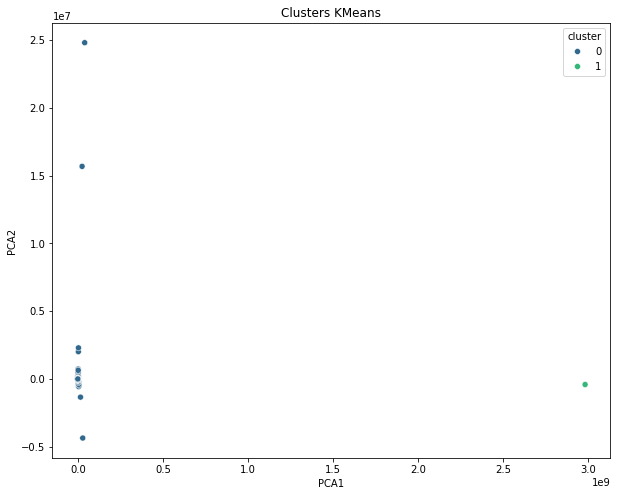

In [36]:

# Selecionar as colunas de features (excluindo a coluna 'fraudulent' e qualquer outra não numérica)

features = df.drop(columns=['fraudulent','predicao']).columns

# Aplicar PCA para reduzir a dimensionalidade para 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[features])

# Adicionar as componentes principais ao dataframe
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

n_clusters = 2  # Defina o número de clusters desejado
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df_kmeans = df
df_kmeans['cluster'] = kmeans.fit_predict(df[features])

# Visualizar os resultados
# Use apenas duas dimensões para visualização, por exemplo, PCA1 e PCA2, ou outra combinação
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_kmeans, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('Clusters KMeans')
plt.show()

## DBSCAN

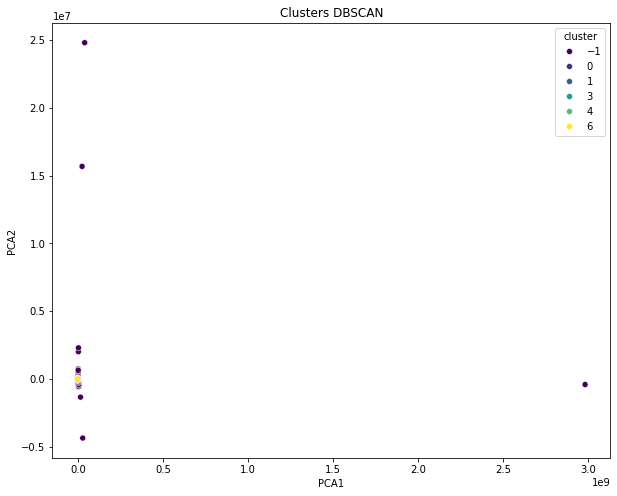

In [201]:
n_clusters = 2  # Defina o número de clusters desejado
df_dbscan = df
dbscan = DBSCAN(eps=1.4, min_samples=110)
df_dbscan['cluster'] = dbscan.fit_predict(df[features])

# Visualizar os resultados
# Use apenas duas dimensões para visualização, por exemplo, PCA1 e PCA2, ou outra combinação
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_dbscan, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('Clusters DBSCAN')
plt.show()

In [206]:
df_dbscan.head()

,telecommuting,has_company_logo,has_questions,fraudulent,salary_min,salary_max,employment_type_-,employment_type_Contract,employment_type_Full-time,employment_type_Other,...,company_profile_vector,description_vector,requirements_vector,benefits_vector,industry_vector,function_vector,predicao,PCA1,PCA2,cluster
3,0,1,0,0,0,0,0,0,1,0,...,0.000941,0.023731,0.036613,0.038574,-0.072177,0.092472,0.0,-741264.092751,-6803.339439,0
5,0,0,0,0,0,0,1,0,0,0,...,0.000000,-0.021327,0.000000,0.000000,0.000000,0.000000,1.0,-741264.092751,-6803.339439,1
7,0,1,1,0,0,0,1,0,0,0,...,0.001002,0.023559,0.003609,0.088344,0.000000,0.000000,0.0,-741264.092751,-6803.339440,1
8,0,1,1,0,0,0,0,0,1,0,...,-0.012821,0.057883,0.012948,0.000000,-0.084057,0.000000,0.0,-741264.092751,-6803.339439,-1
15,0,1,1,0,120000,150000,0,0,1,0,...,0.036647,0.011106,-0.002502,-0.006109,-0.102045,0.092472,0.0,-137912.472464,-77279.025291,-1


In [189]:
df_dbscan.cluster.nunique()

7

In [207]:
cluster_counts = df_dbscan['cluster'].value_counts()

print(cluster_counts)

-1    2148
 1     792
 2     501
 0     369
 6     186
 5     175
 4     162
 3     137
Name: cluster, dtype: int64


Análise de médias por cluster

In [203]:
cluster_stats = df_dbscan.groupby('cluster').agg(['mean'])

print(tabulate(cluster_stats, headers='keys', tablefmt='pretty'))

+---------+---------------------------+------------------------------+---------------------------+------------------------+------------------------+------------------------+-------------------------------+--------------------------------------+---------------------------------------+-----------------------------------+---------------------------------------+---------------------------------------+-----------------------------------+-------------------------------------------+------------------------------------------+---------------------------------------------+-------------------------------------------+--------------------------------------------+--------------------------------------------------+------------------------------------------------+----------------------------------+-------------------------------------------------+--------------------------------------------------+----------------------------------------------+------------------------------------------+----------------

Distribuição de features em predições de fraude

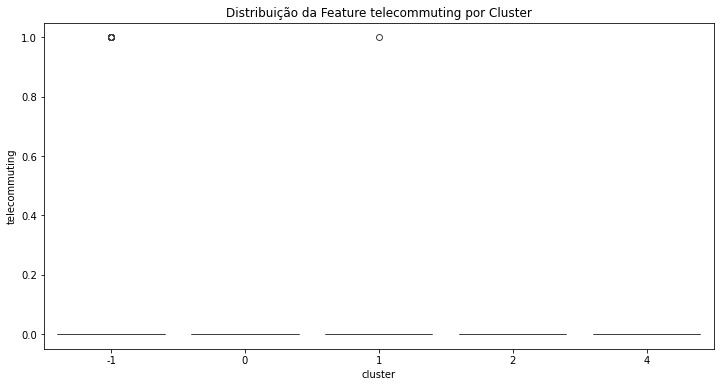

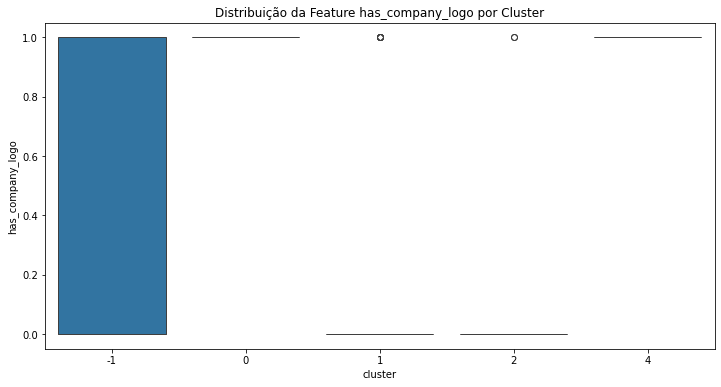

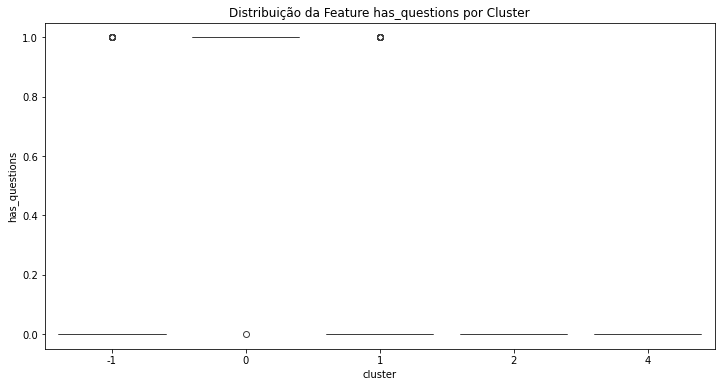

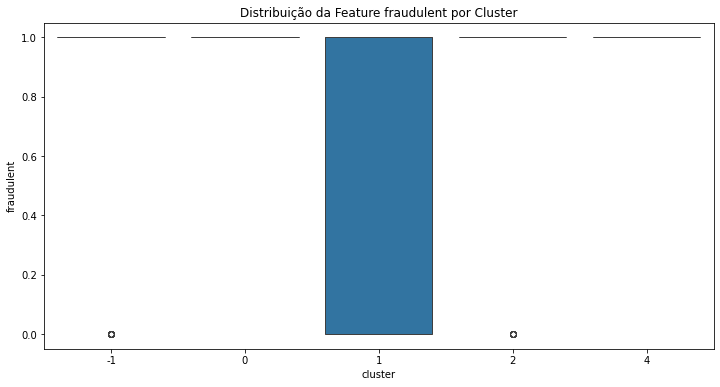

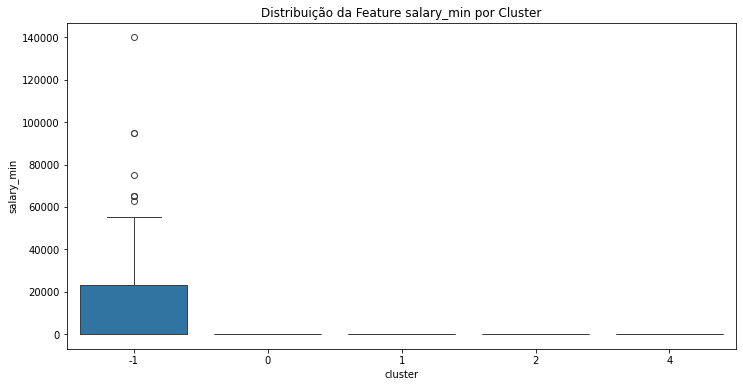

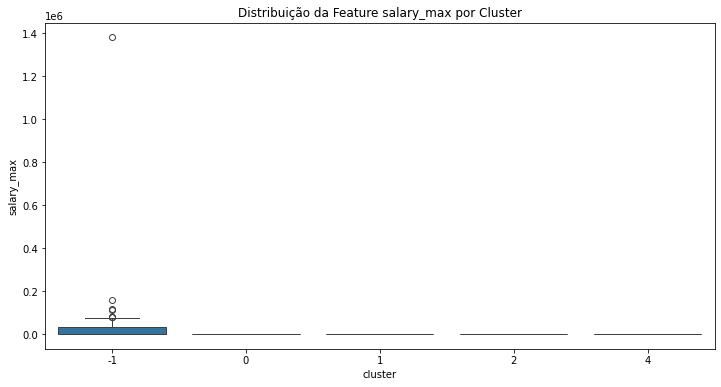

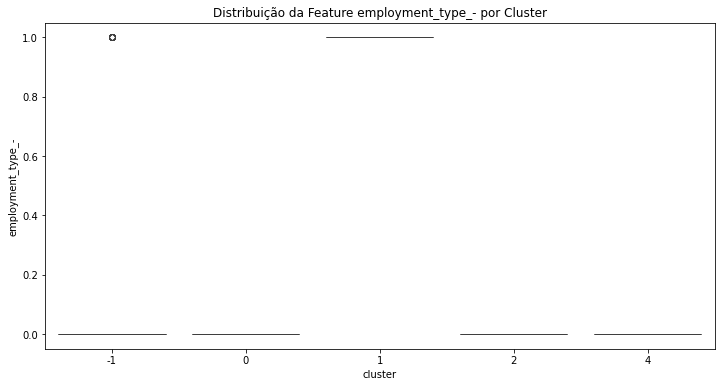

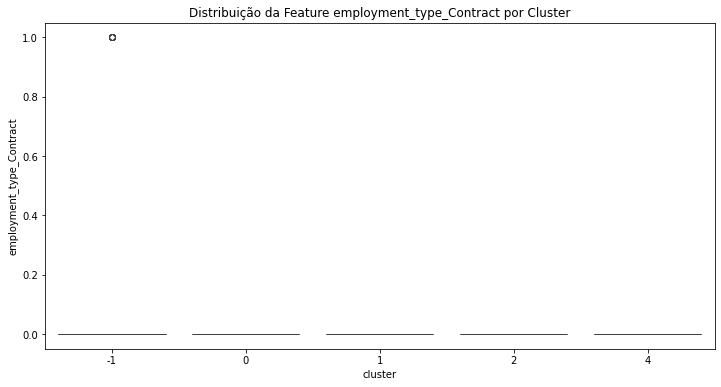

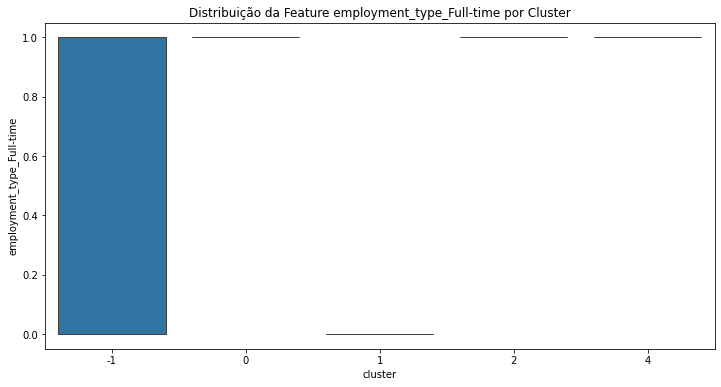

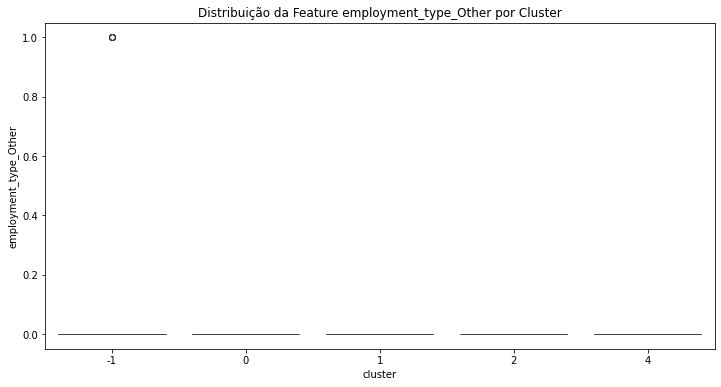

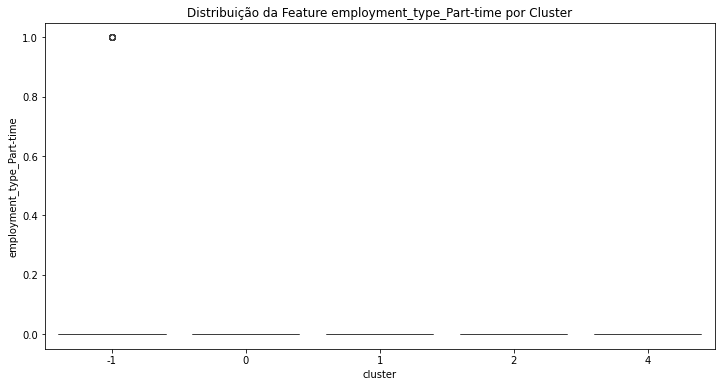

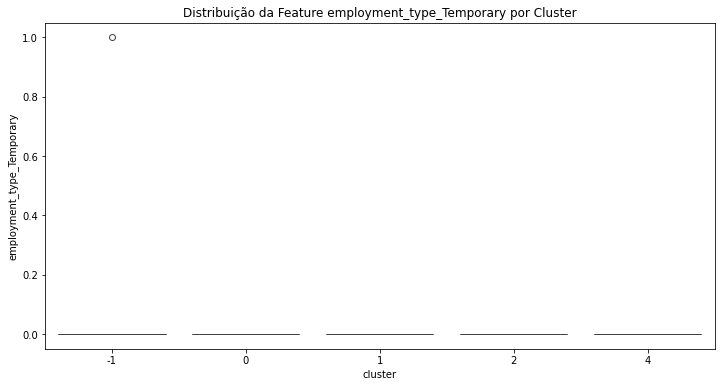

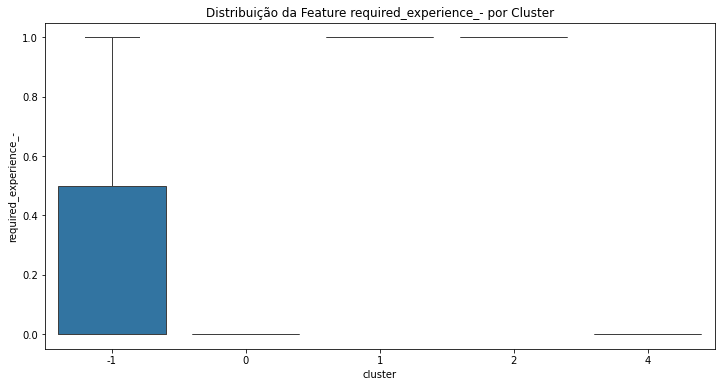

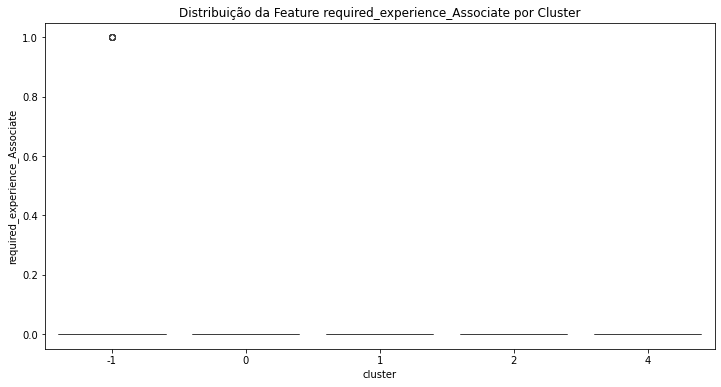

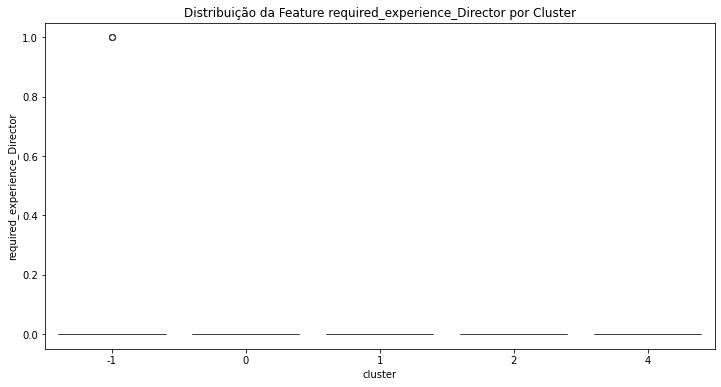

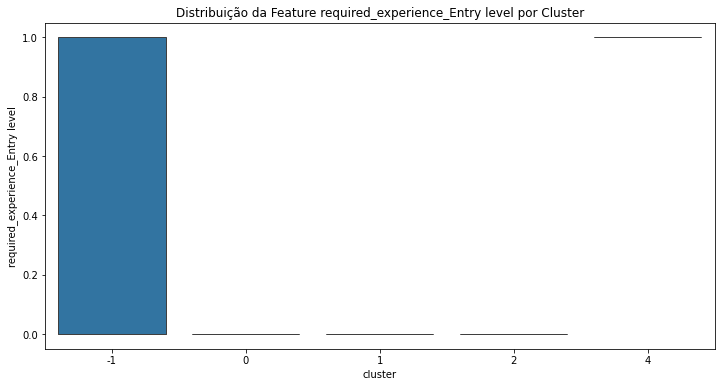

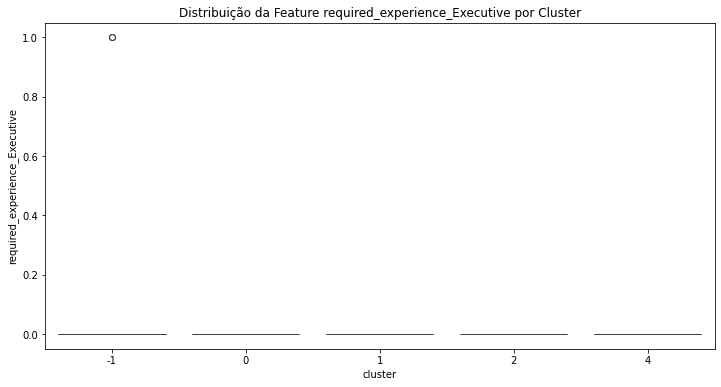

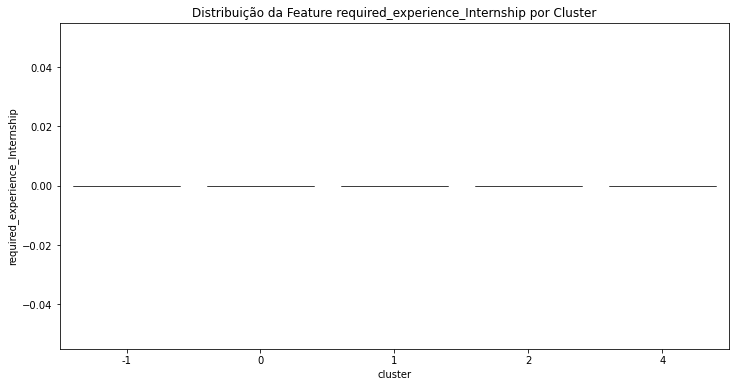

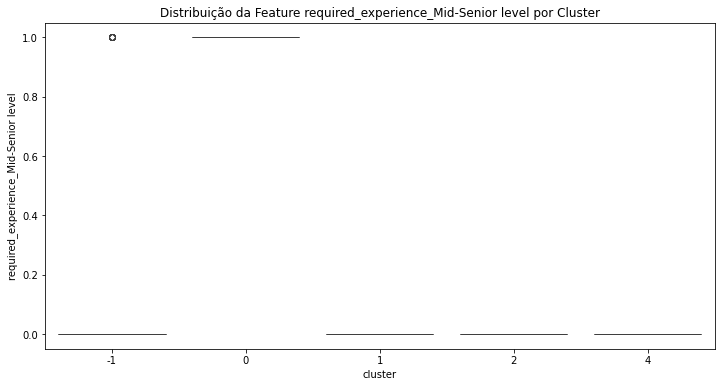

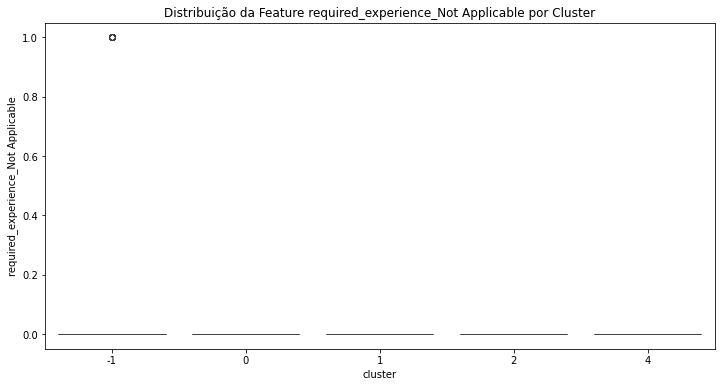

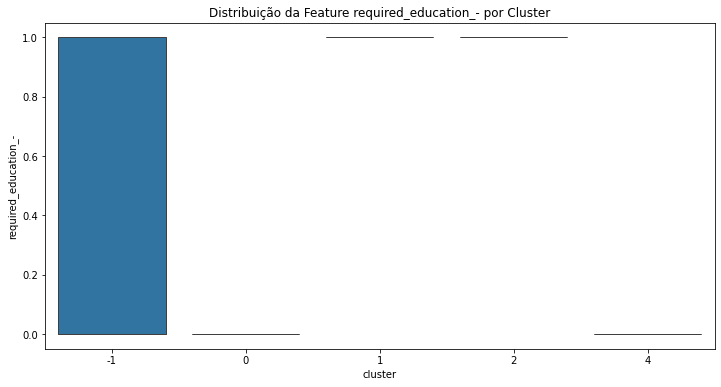

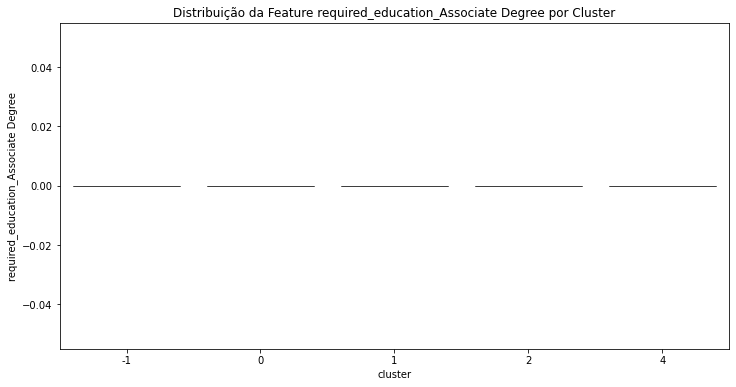

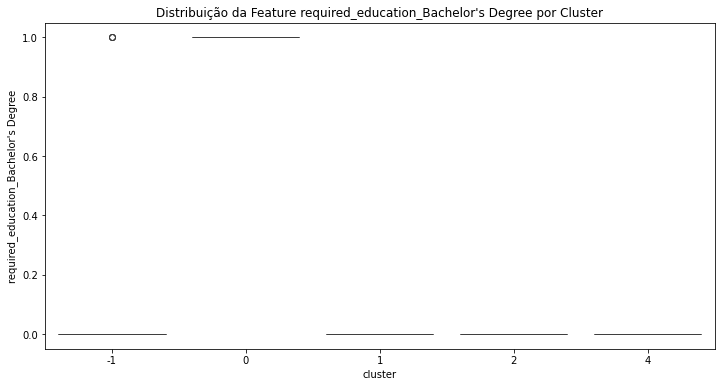

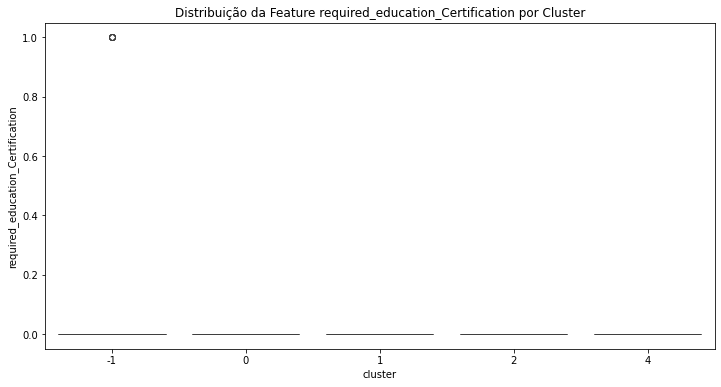

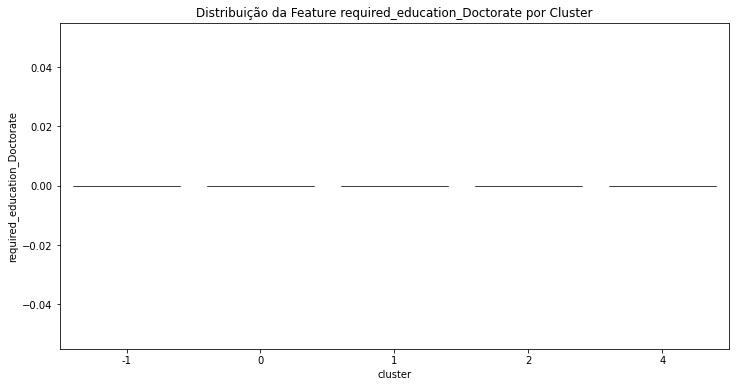

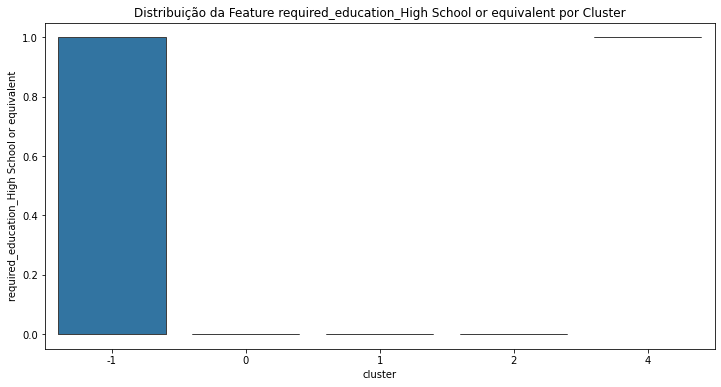

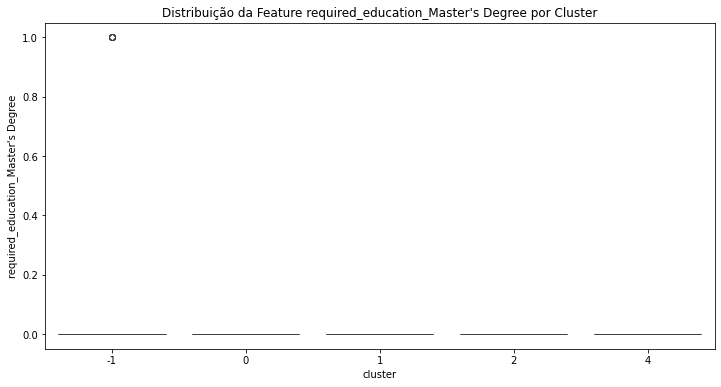

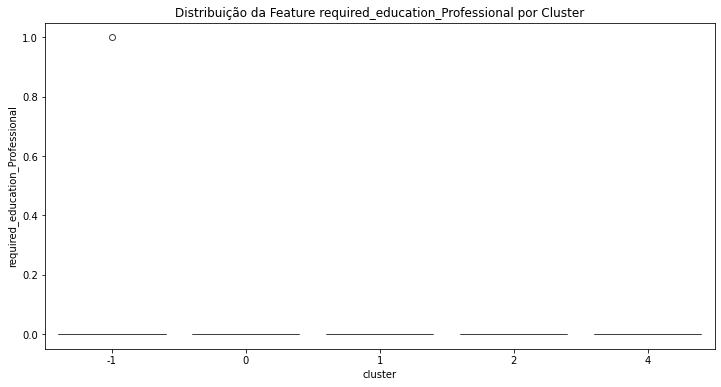

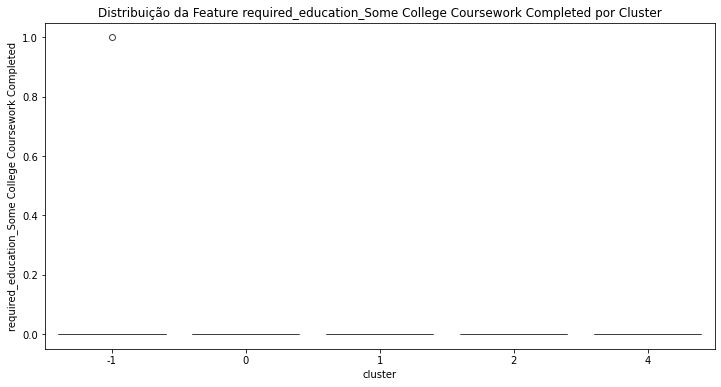

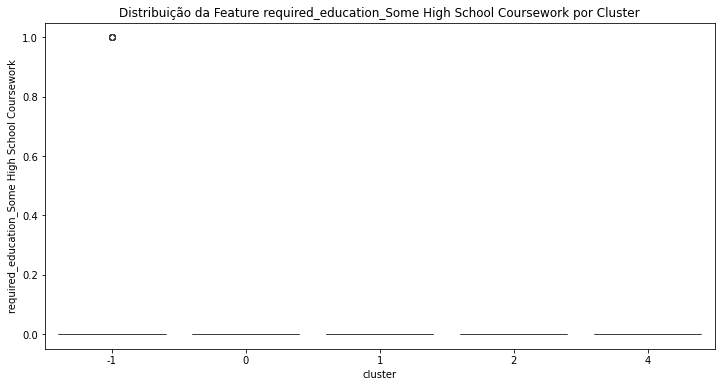

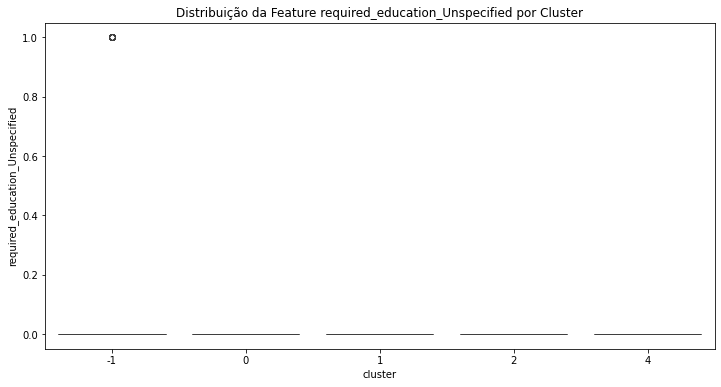

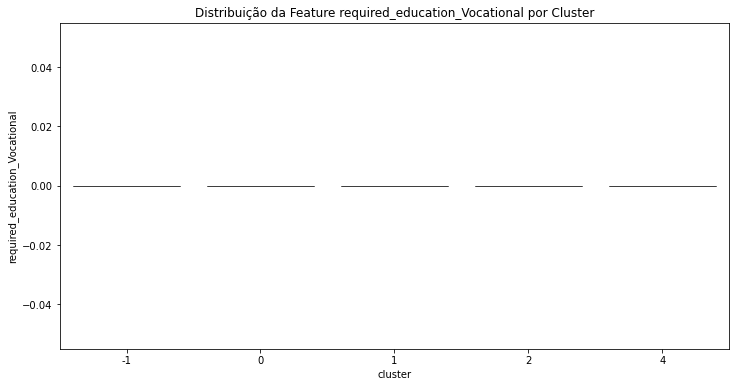

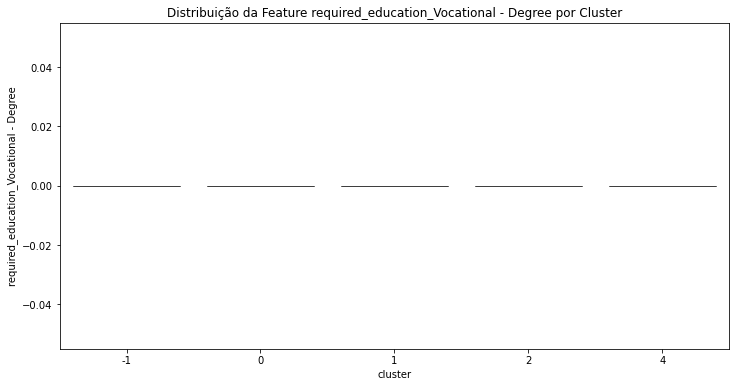

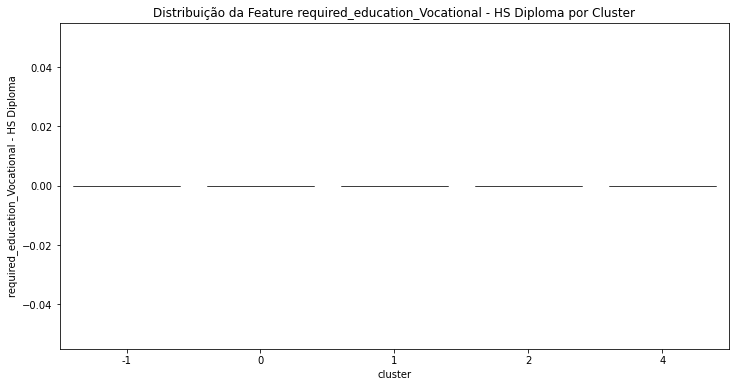

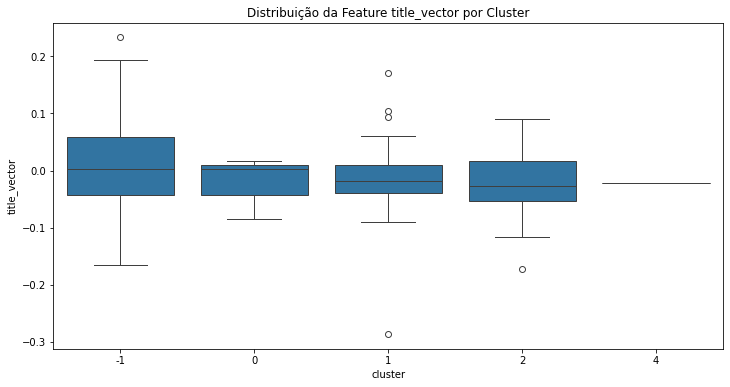

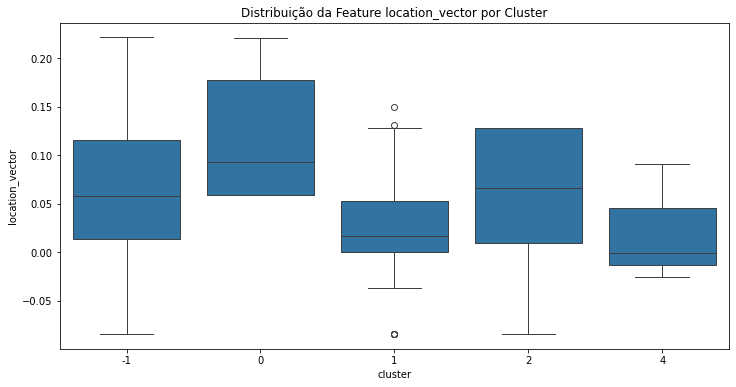

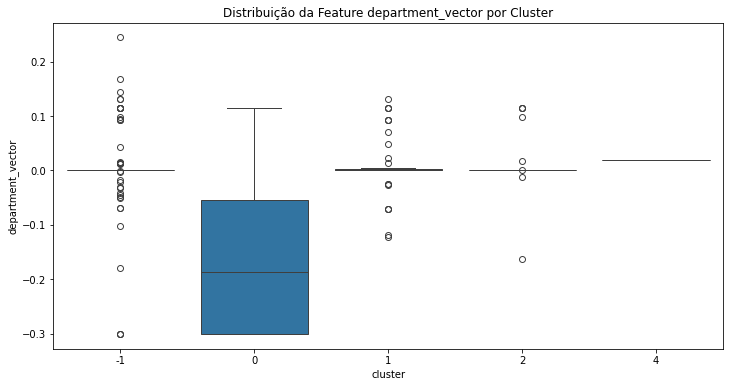

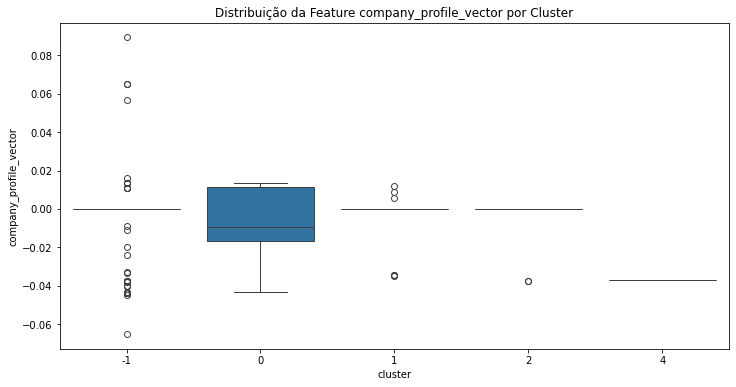

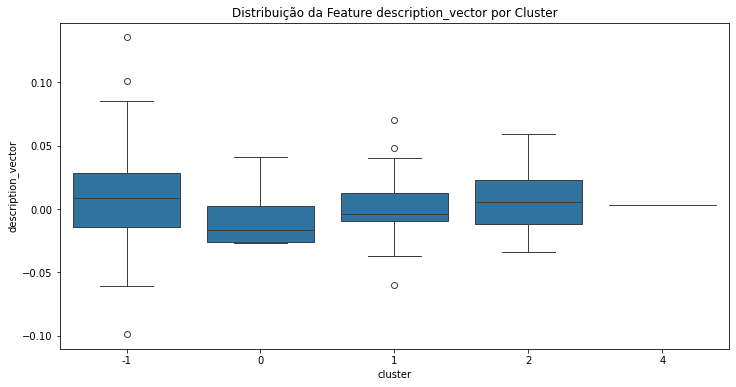

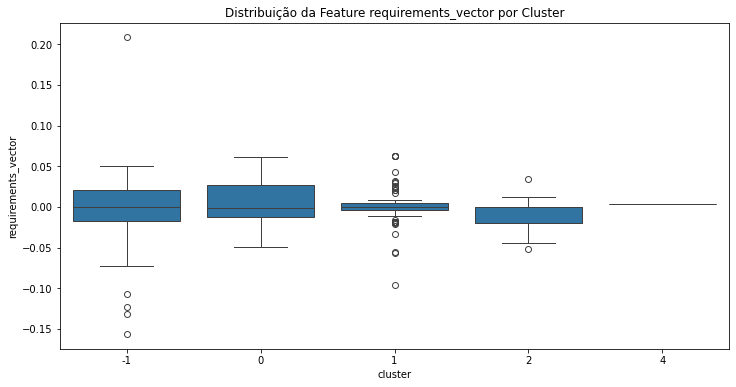

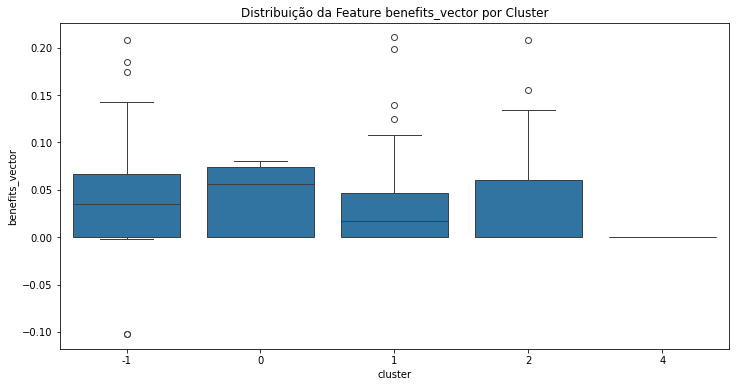

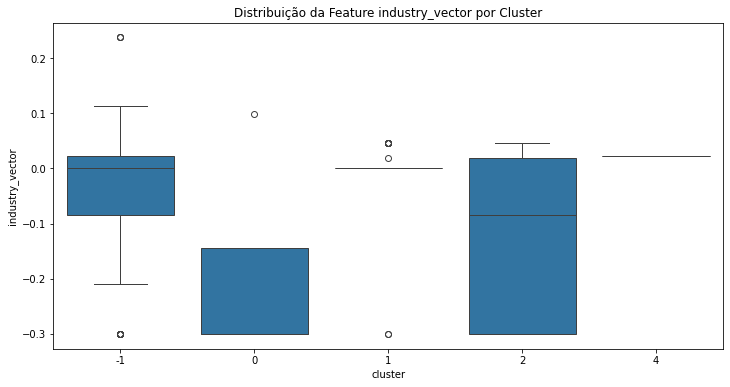

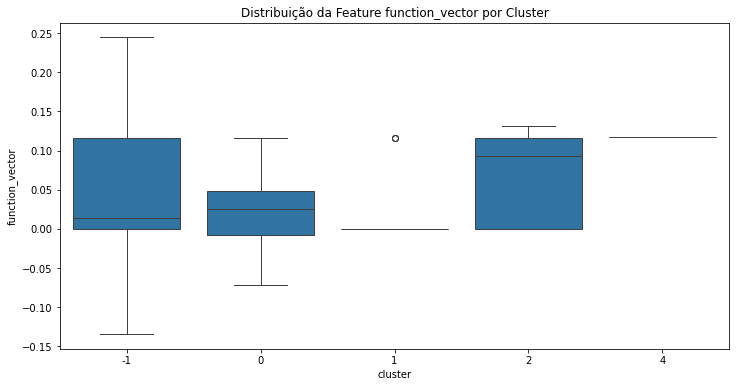

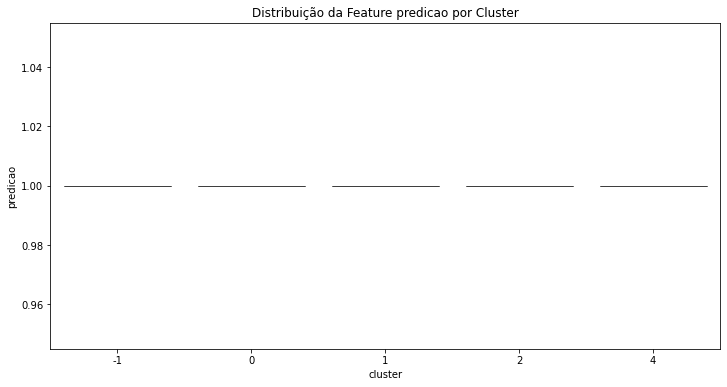

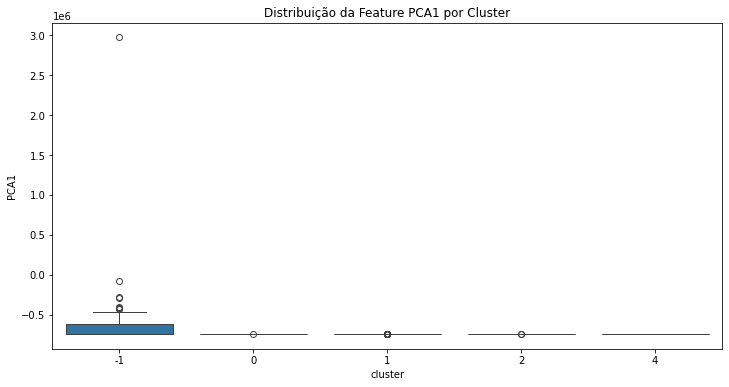

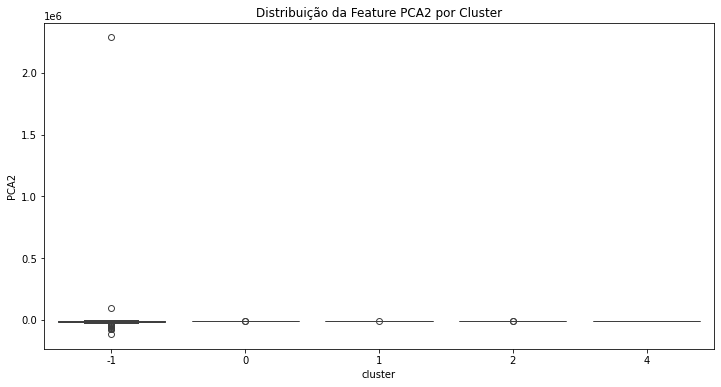

In [205]:
features_ = [col for col in df_dbscan.columns if col != 'cluster']

# Crie um gráfico para cada feature
for feature in features_:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_dbscan.loc[df_dbscan['predicao'] == 1], x='cluster', y=feature)
    plt.title(f'Distribuição da Feature {feature} por Cluster')
    plt.show()